 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [438]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [439]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [440]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [441]:
# Drop nulls
whale_data = whale_returns.dropna()
whale_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [442]:
# Reading algorithmic returns

algo_returns_csv = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head() 

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [443]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [444]:
# Drop nulls
algo_data = algo_returns.dropna()
algo_data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [464]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head() 

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [465]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [466]:
# Fix Data Types (close column)
sp500_history["Close"] = sp500_history["Close"].str.replace("$","")
sp500_history["Close"] = sp500_history["Close"].str.replace(",","")


sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [467]:
# Calculate Daily Returns
daily_returns = sp500_history.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [468]:
# Count nulls
daily_returns.isnull().sum()

Close    1
dtype: int64

In [469]:
# Drop nulls
daily_data = daily_returns.dropna()
daily_data

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [470]:
# Rename `Close` Column to be specific to this portfolio.
daily_data = daily_data.rename(columns={"Close": "SP500 Index Historical"})
daily_data.head()

,SP500 Index Historical
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [471]:
combined_portfolios_df = pd.concat([whale_data,algo_data,daily_data], axis='columns',join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Index Historical
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


## Combine Whale, Algorithmic, and S&P 500 Returns

<AxesSubplot:xlabel='Date'>

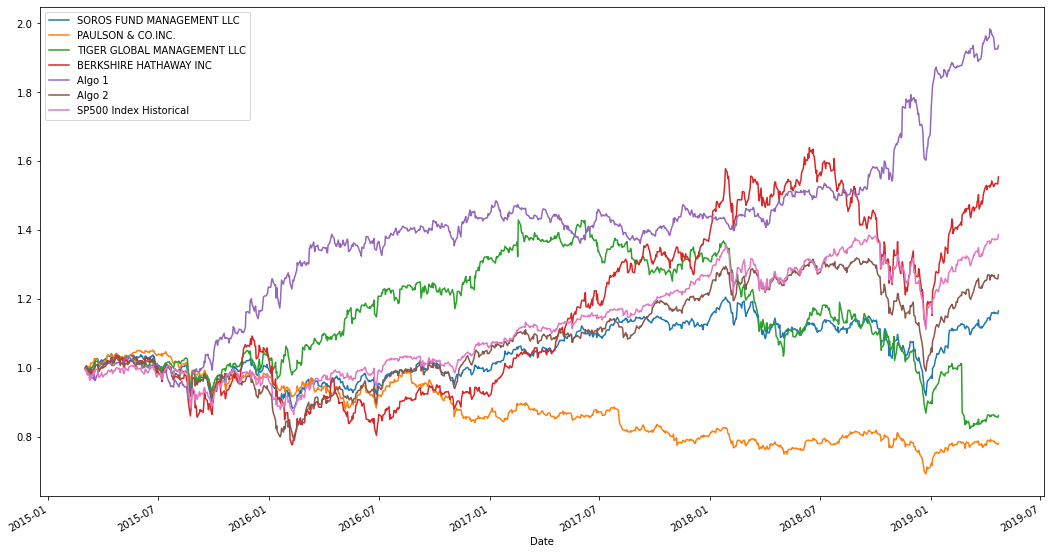

In [472]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Plot cumulative returns
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(18,10))

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

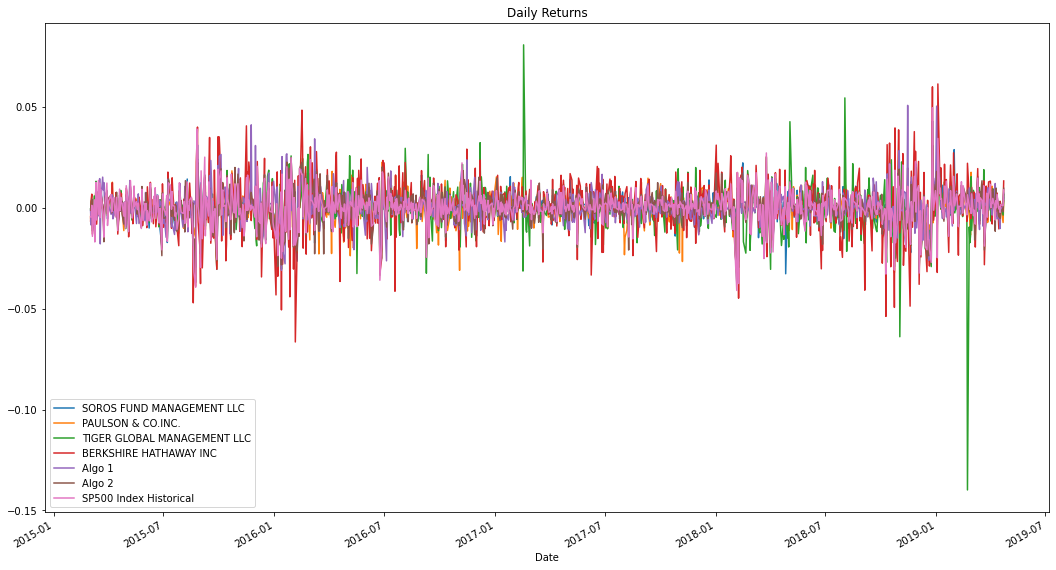

In [473]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot(title="Daily Returns", figsize=(18,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

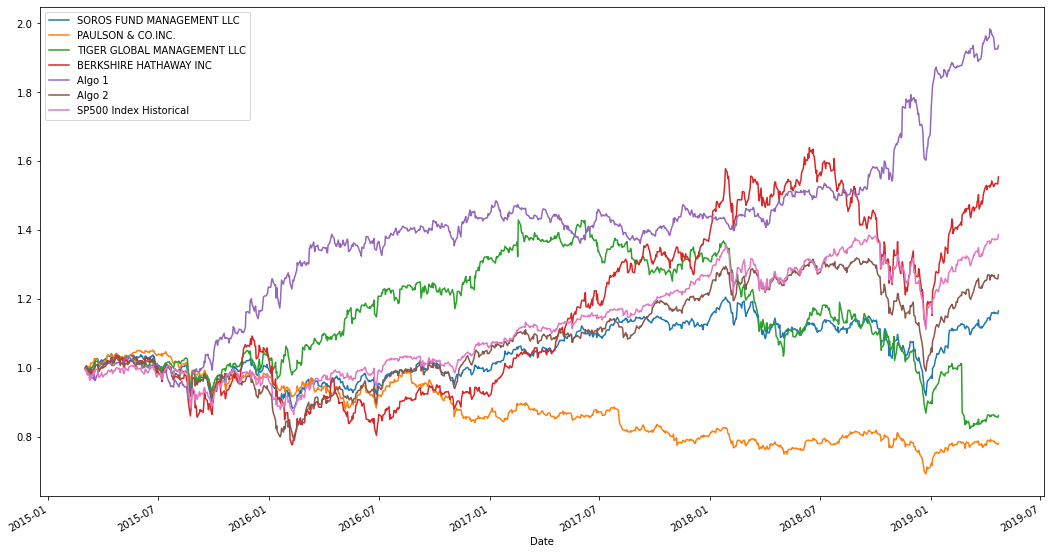

In [474]:
# Calculate cumulative returns of all portfolios
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(18,10))
# Plot cumulative returns

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

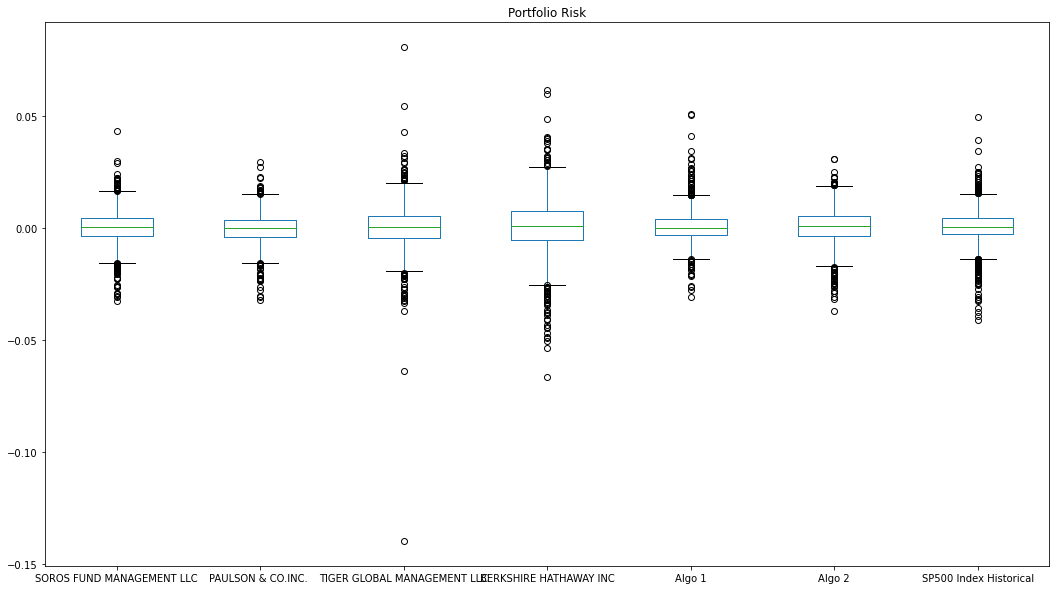

In [475]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title= "Portfolio Risk", figsize=(18,10))

### Calculate Standard Deviations

In [476]:
# Calculate the daily standard deviations of all portfolios
daily_standard = combined_portfolios_df.std().sort_values(ascending=False)
daily_standard

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500 Index Historical         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [477]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_SP500 = daily_standard > daily_standard ['SP500 Index Historical']
portfolios_riskier_than_SP500

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
SP500 Index Historical         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [478]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard = daily_standard *np.sqrt(252)
annualized_standard.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500 Index Historical         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

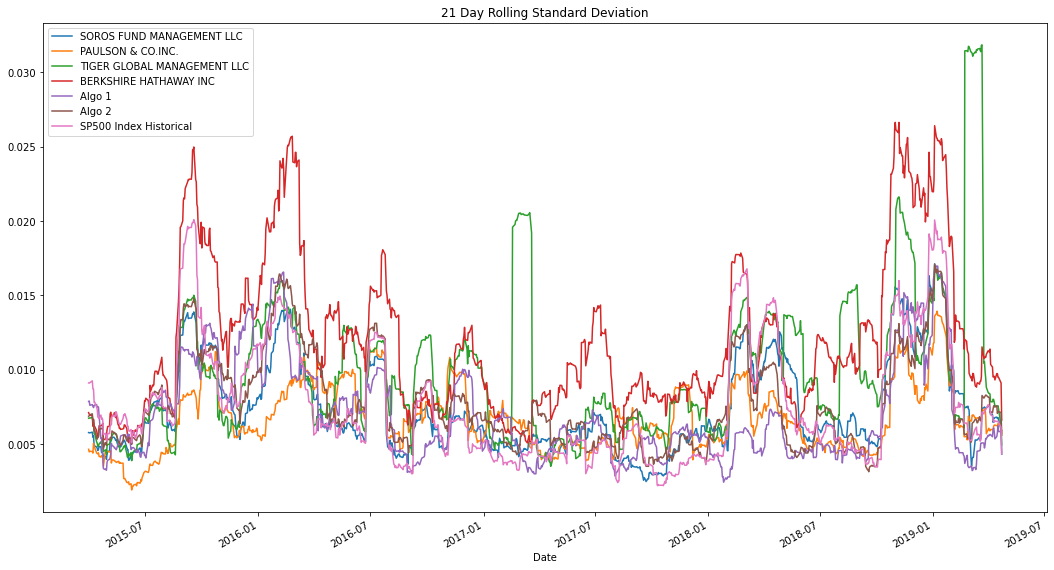

In [479]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_portfolios_df.rolling(window=21).std().plot(title= "21 Day Rolling Standard Deviation", figsize=(18,10))

### Calculate and plot the correlation

In [480]:
# Calculate the correlation
# Display de correlation matrix

correlation_trend = combined_portfolios_df.corr()
correlation_trend

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Index Historical
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Index Historical,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

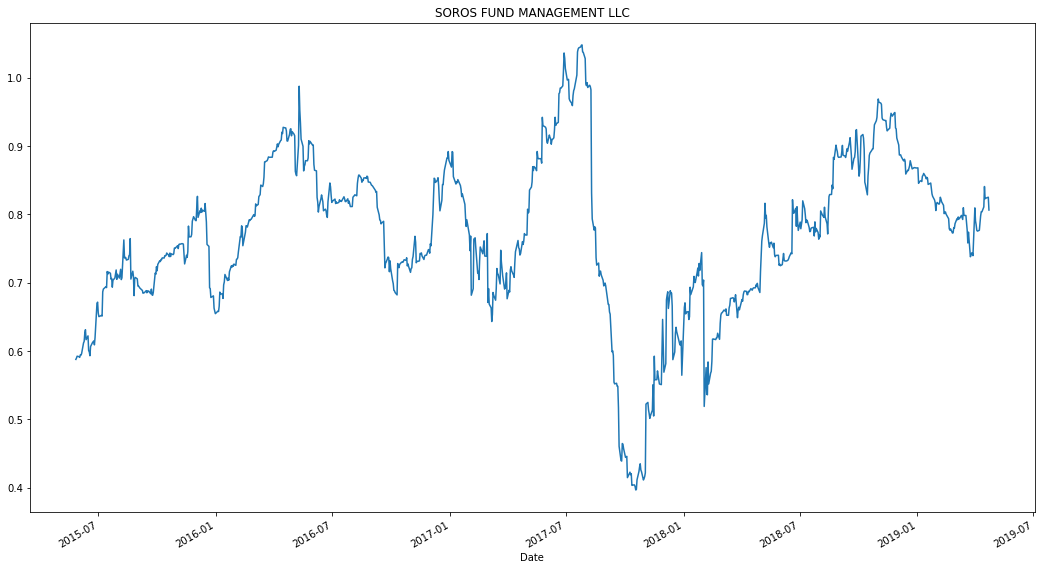

In [481]:
# Calculate covariance of a single portfolio

SOROS_covariance = combined_portfolios_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_portfolios_df['SP500 Index Historical'])
SOROS_covariance

# Calculate variance of S&P 500
SP500_variance = combined_portfolios_df['SP500 Index Historical'].rolling(window=60).var()
SP500_variance
# Computing beta
SOROS_beta = SOROS_covariance / SP500_variance
# Plot beta trend
SOROS_beta_plot = SOROS_beta.plot(title="SOROS FUND MANAGEMENT LLC", figsize=(18, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

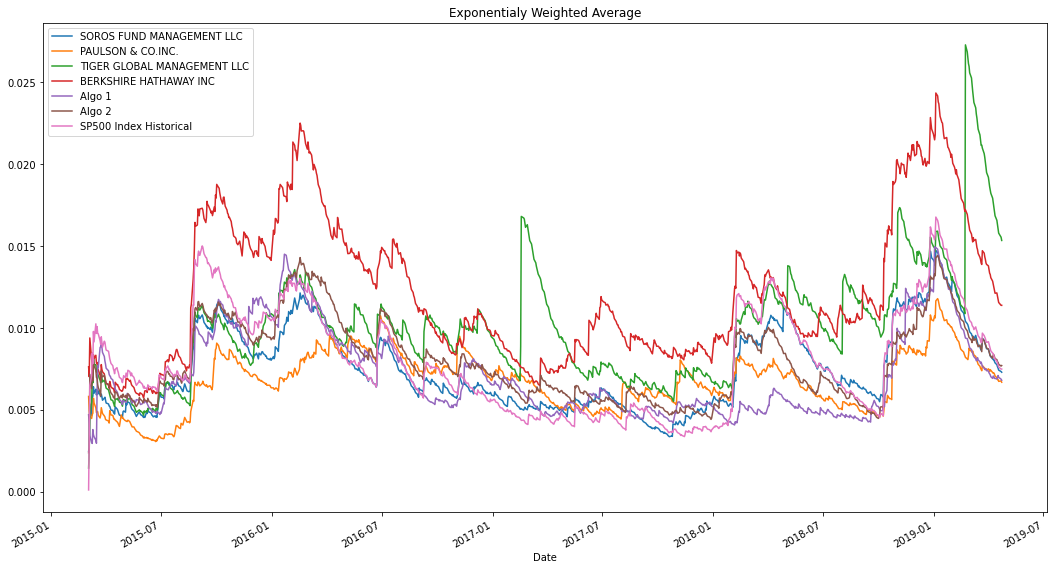

In [482]:
# Use `ewm` to calculate the rolling window
rolling_window_ewm = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(18, 10))
rolling_window_ewm

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [483]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Index Historical         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

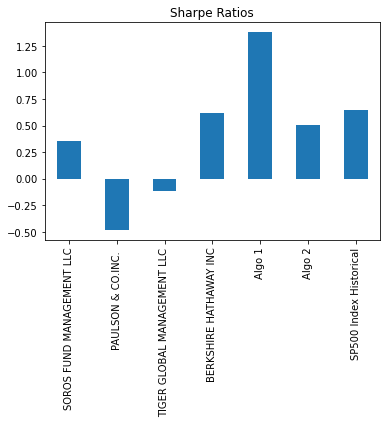

In [484]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 2 does not outperform the S&P 500 however, Algo 1 blows it out of the water. Algo 2 does better than the whales portfolios however, Algo 2 does better than all but Berkshire Hathaway Inc. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [485]:
# Reading data from 1st stock
csvpath = Path("goog_historical.csv")
goog_sales_dataframe = pd.read_csv("goog_historical.csv",index_col = "Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_sales_dataframe = goog_sales_dataframe.sort_index()
goog_sales_dataframe.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [486]:
# Reading data from 2nd stock
csvpath = Path("aapl_historical.csv")
aapl_sales_dataframe = pd.read_csv("aapl_historical.csv", index_col = "Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_sales_dataframe = aapl_sales_dataframe.sort_index()
aapl_sales_dataframe.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [487]:
# Reading data from 3rd stock
csvpath = Path("cost_historical.csv")
cost_sales_dataframe = pd.read_csv("cost_historical.csv",index_col = "Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_sales_dataframe = cost_sales_dataframe.sort_index()
cost_sales_dataframe.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [488]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([goog_sales_dataframe ,aapl_sales_dataframe ,cost_sales_dataframe], axis='rows',join='inner')
combined_stocks = combined_stocks.reset_index()
combined_stocks.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [489]:
#Pivot data and change column names 
combined_portfolio =  combined_stocks.pivot_table(values="NOCP",index="Trade DATE",columns="Symbol") 
combined_portfolio

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [490]:
# Calculate daily returns by showing each stock as it's own Column
daily_returns = combined_portfolio.pct_change()
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [491]:
# Drop NAs
# Display sample data
daily_combinedstocks = daily_returns.dropna()
daily_combinedstocks

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [492]:
# Set weights
# Calculate portfolio return
# Display sample data
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_combinedstocks.dot(weights)
portfolio_returns = portfolio_returns.rename("Weighted Portfolio Returns")
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
Name: Weighted Portfolio Returns, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [493]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios_df = pd.concat([whale_data,algo_data,daily_data,portfolio_returns], axis='columns',join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Index Historical,Weighted Portfolio Returns
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [494]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios_df = combined_portfolios_df.dropna()
combined_portfolios_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Index Historical,Weighted Portfolio Returns
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [495]:
# Calculate the annualized `std`
volatility = combined_portfolios_df.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500 Index Historical         0.152054
Weighted Portfolio Returns     0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}>

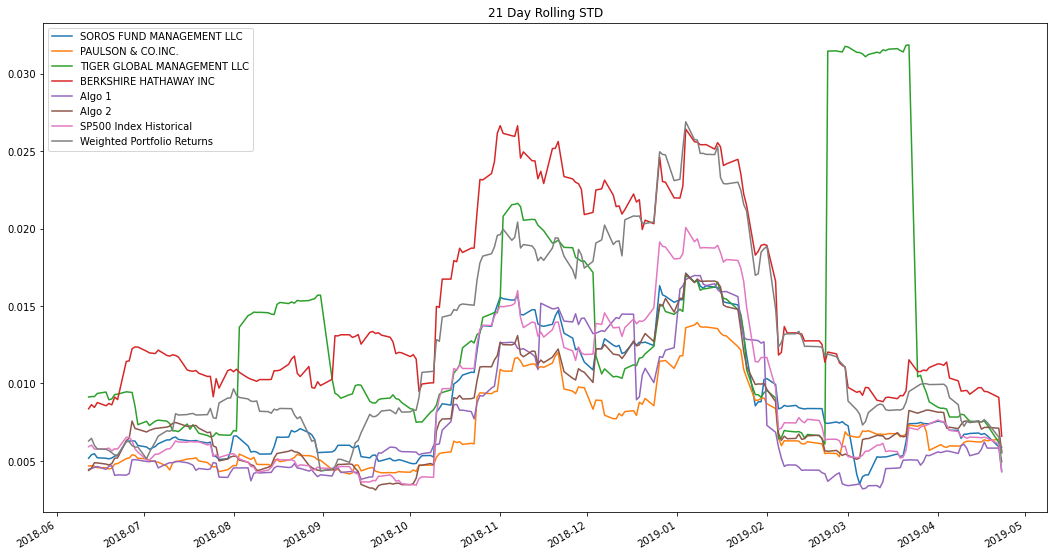

In [496]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling STD", figsize=(18,10))

### Calculate and plot the correlation

<AxesSubplot:>

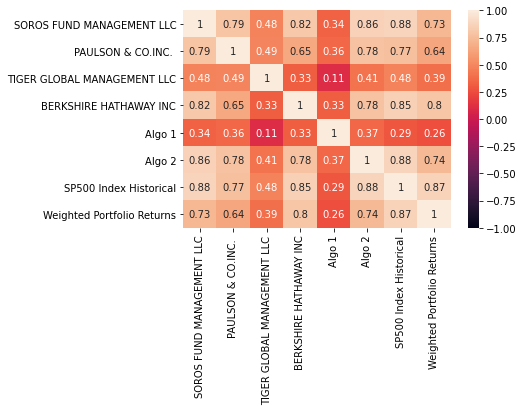

In [497]:
# Calculate and plot the correlation
corr_trend = combined_portfolios_df.corr()
corr_trend.head()

sns.heatmap(corr_trend, vmin=-1,vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

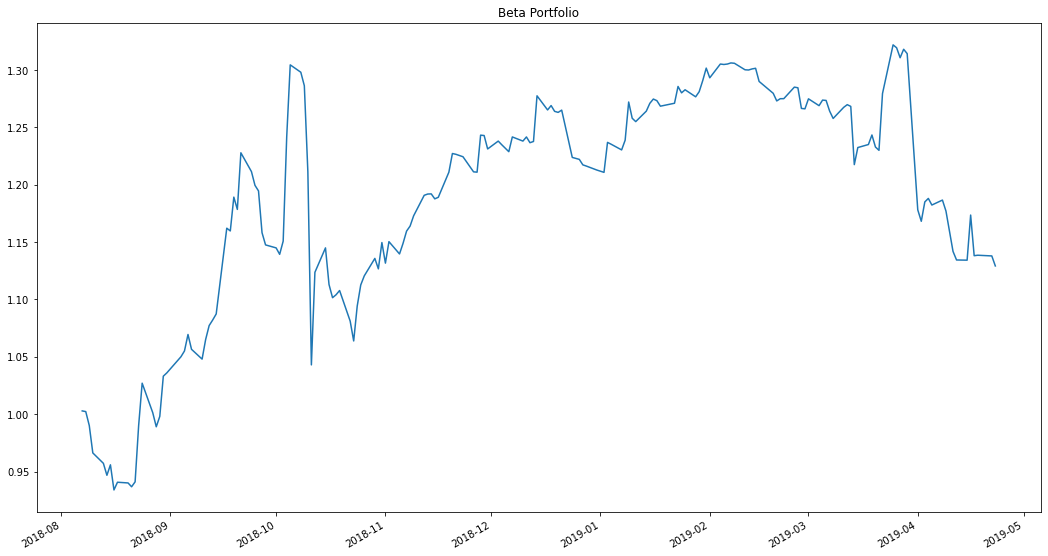

In [498]:
# Calculate and plot Beta
portfolio_cov = combined_portfolios_df['Weighted Portfolio Returns'].rolling(window=60).cov(combined_portfolios_df['SP500 Index Historical'])
portfolio_cov
                                                                                    
var_2 = combined_portfolios_df['SP500 Index Historical'].rolling(window=60).var()
var_2 
                                                                                    
portfolio_beta = portfolio_cov/var_2
portfolio_beta_plot = portfolio_beta.plot(title= "Beta Portfolio", figsize=(18,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [499]:
# Calculate Annualzied Sharpe Ratios
combined_sharpe = combined_portfolios_df.mean() * 252 /volatility 
combined_sharpe.sort_values(ascending=False) 

Algo 1                         2.035665
Weighted Portfolio Returns     0.933123
SP500 Index Historical         0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
Algo 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

<AxesSubplot:title={'center':'Combined Sharpe Ratios'}>

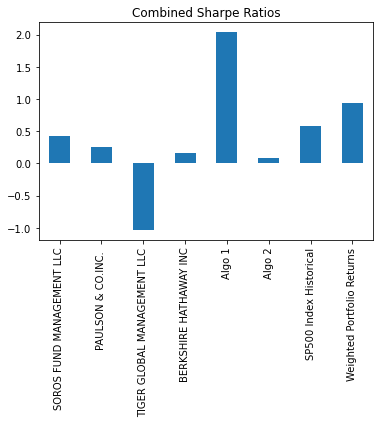

In [500]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe.plot(kind="bar", title= "Combined Sharpe Ratios")

### How does your portfolio do?

Algo 1 does really well however Tiger Global doesn't do quite as well based on the charts above. My weighted portfolio returns overall produces a pretty average return.